In [2]:
import pandas as pd

In [37]:
df = pd.read_excel("../manual_PeatMOSS.xlsx")

In [38]:
df.head()

,Unnamed: 0,Repo URL,Repo Stars,Repo Forks,Repo Watchers,Model url,Pre trained models used,Pre trained models tested,Unnamed: 8,Unit Testing,Integration test,YAML files … how many ?,Can run integration test?,Type
0,514,github.com/hwchase17/langchain,76738,11785,76738,https://huggingface.co/gpt2,gpt2?,Yes,NaN,Yes,Yes,1,Yes,Tool
1,1254,github.com/tensorflow/models,76410,46188,76410,https://huggingface.co/bert-base-uncased,bert-base-uncased,No,NaN,Yes,No,2,No,Research
2,1117,github.com/CompVis/stable-diffusion,63529,9708,63529,https://huggingface.co/bert-base-uncased,CompVis_stable-diffusion/stable-diffusion/ldm/...,No,NaN,No,No,0,NaN,Research
3,762,github.com/openai/openai-cookbook,53939,9014,53939,https://huggingface.co/gpt2,gpt3,No,NaN,No,No,4,NaN,Examples
4,491,github.com/labmlai/anNotated_deep_learning_pap...,43451,4648,43451,https://huggingface.co/gpt2,"gpt2,bert-base-uncased",No,NaN,No,No,0,No,Examples


In [39]:
df['Type'].unique()

array(['Tool', 'Research', 'Examples'], dtype=object)

In [40]:
df_grouped = df.groupby("Type")

In [41]:
df_grouped.get_group("Examples")

,Unnamed: 0,Repo URL,Repo Stars,Repo Forks,Repo Watchers,Model url,Pre trained models used,Pre trained models tested,Unnamed: 8,Unit Testing,Integration test,YAML files … how many ?,Can run integration test?,Type
3,762,github.com/openai/openai-cookbook,53939,9014,53939,https://huggingface.co/gpt2,gpt3,No,NaN,No,No,4,NaN,Examples
4,491,github.com/labmlai/anNotated_deep_learning_pap...,43451,4648,43451,https://huggingface.co/gpt2,"gpt2,bert-base-uncased",No,NaN,No,No,0,No,Examples
14,3225,github.com/spmallick/learNopencv,19978,11470,19978,https://github.com/ultralytics/yolov5,NaN,NaN,NaN,No,No,0,NaN,Examples
15,2953,github.com/WZMIAOMIAO/deep-learning-for-image-...,19589,7602,19589,https://github.com/ultralytics/yolov5,"LeNet,AlexNet,GoogleNet,VggNet,etc.",Yes,NaN,Yes,Yes,NaN,NaN,Examples
32,2010,github.com/aws/amazon-sagemaker-examples,9305,6569,9305,https://huggingface.co/bert-base-uncased,"bert-base-uncased,clip-vit-large-patch14",No,NaN,Yes,No,0,NaN,Examples
43,2351,github.com/pytorch/Exampless,7638,3911,7638,https://huggingface.co/bert-base-uncased,bert-base-uncased,No,NaN,No,No,Multiple,NaN,Examples


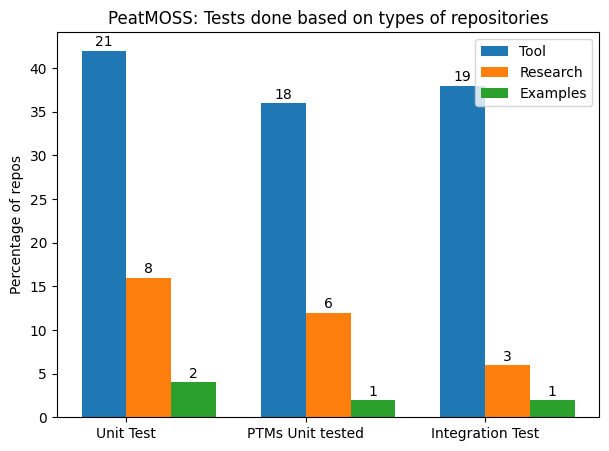

In [42]:
import matplotlib.pyplot as plt
labels = ["Unit Test" , "PTMs Unit tested" , "Integration Test"]
#x = [0,10,20]
# plot bars in stack manner
plt.figure(figsize=(7,5))
bar_width = 0.25
x = range(len(labels))
for repo_type in df['Type'].unique():
    ut = sum(df_grouped.get_group(repo_type)["Unit Testing"]=="Yes")
    ptm_test = sum(df_grouped.get_group(repo_type)["Pre trained models tested"]=="Yes")
    it = sum(df_grouped.get_group(repo_type)["Integration test"]=="Yes")
    plt.bar(x, [ut*100/len(df), ptm_test*100/len(df),it*100/len(df)], width=bar_width , label=repo_type)
    plt.text(x[0],ut*100/len(df)+0.5,str(ut),ha="center")
    plt.text(x[1],ptm_test*100/len(df)+0.5,str(ptm_test),ha="center")
    plt.text(x[2],it*100/len(df)+0.5,str(it),ha="center")
    x = [i + bar_width for i in x]
    #x = [i+2 for i in x]
plt.ylabel("Percentage of repos")
plt.xticks([i + bar_width/2 for i in range(len(labels))], labels)
#plt.bar(x, y2, bottom=y1, color='b')
plt.title("PeatMOSS: Tests done based on types of repositories")
plt.legend()
plt.show()

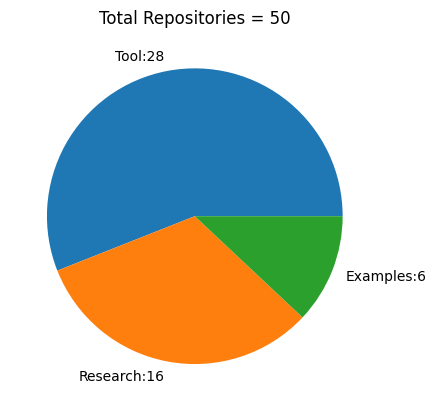

In [43]:
labels = [f"{s}:{n}" for s,n in df['Type'].value_counts().items()]
plt.pie(df['Type'].value_counts().values , labels=labels)
plt.title(f"Total Repositories = {len(df)}")
plt.show() 

In [44]:
df.loc[df['Unit Testing']==' Yes']

,Unnamed: 0,Repo URL,Repo Stars,Repo Forks,Repo Watchers,Model url,Pre trained models used,Pre trained models tested,Unnamed: 8,Unit Testing,Integration test,YAML files … how many ?,Can run integration test?,Type


<Axes: xlabel='Repo Stars', ylabel='Unit Testing'>

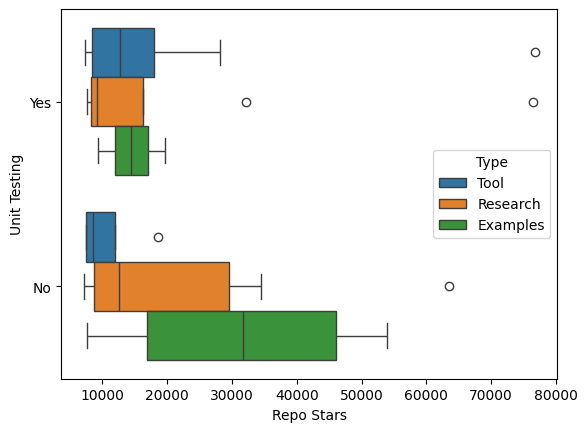

In [47]:
import seaborn as sns
sns.boxplot(data=df, x="Repo Stars", y="Unit Testing", hue="Type")


<Axes: xlabel='Repo Stars', ylabel='Pre trained models tested'>

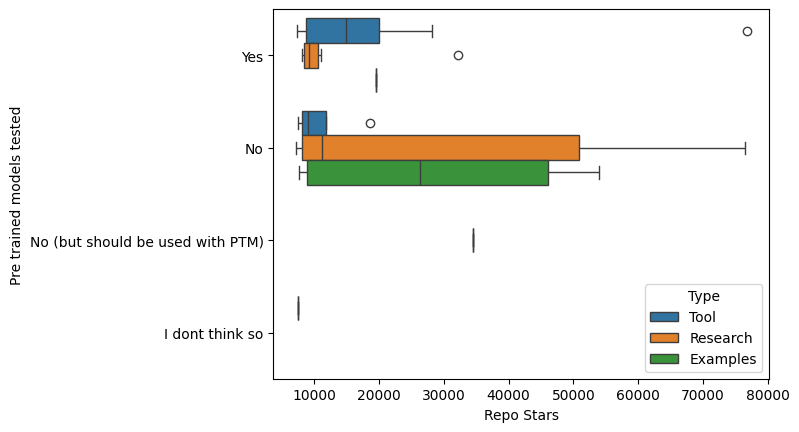

In [48]:
sns.boxplot(data=df, x="Repo Stars", y="Pre trained models tested", hue="Type")

<Axes: xlabel='Repo Stars', ylabel='Integration test'>

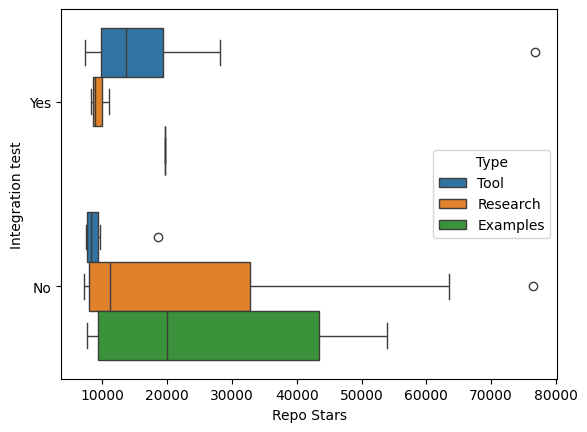

In [49]:
sns.boxplot(data=df, x="Repo Stars", y="Integration test", hue="Type")

In [16]:
df_MLprod = pd.read_excel("../manual_MLProducts.xlsx")
df_MLprod.head()

,Name,Link(s),Description,Have ML?,End user app?,Found in?,Appears more like...,Stars,Contributors,CodeBase Size,Pre trained models used,Pre trained models tested,Unit Testing,Integration test,Number of YAML files,Can run integration test
0,electricitymap/electricitymap-contrib,https://github.com/electricitymap/electricitym...,a nice web app for CO2 emissions of electrici...,use some estimation models,web app available to use directly,Web: Python,Final end-user product,2566,268,148456,NaN,NaN,NaN,NaN,NaN,NaN
1,freqtrade/freqtrade,https://github.com/freqtrade/freqtrade,crypto trading bot,machine learning to optimize buy/sell strategy...,"Looks like library with cmd, but can be used b...",Web: Python,Final end-user product,20992,260,151364,No,no,Yes,NaN,NaN,NaN
2,galaxyproject/galaxy,https://github.com/galaxyproject/galaxy,Data analysis tool for everyone.\n,Can see numpy and tensorflow,"Looked targetted towards ds, but says that its...",Web: Python,Final end-user product,1021,255,596099,Yes,No,Yes,Yes,Multiple,No
3,psychopy/psychopy,https://github.com/psychopy/psychopy,app for psycological analysis.,"use speech_recognition, use numpy a lot",have stanalone installation for mac,Web: Python,Final end-user product,1321,161,196651,Yes,Yes,Yes,Yes,1,NaN
4,MycroftAI/mycroft-core,https://github.com/MycroftAI/mycroft-core,voice assistant,have tts module,can buy the speaker with it,Web: Python,Final end-user product,5997,157,120114,No,NaN,Yes,Yes,2 (yml),Yes


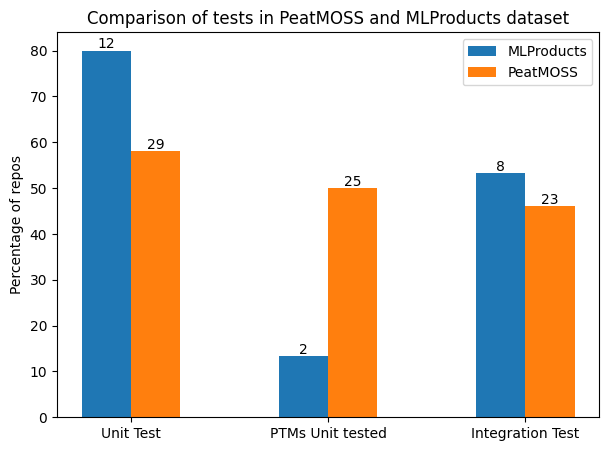

In [19]:
import matplotlib.pyplot as plt
labels = ["Unit Test" , "PTMs Unit tested" , "Integration Test"]
#x = [0,10,20]
# plot bars in stack manner
plt.figure(figsize=(7,5))
bar_width = 0.25
x = range(len(labels))
#for repo_type in df['Type'].unique():
ut = sum(df_MLprod["Unit Testing"]=="Yes")
ptm_test = sum(df_MLprod["Pre trained models tested"]=="Yes")
it = sum(df_MLprod["Integration test"]=="Yes")

ut_PeatMOSS = sum(df["Unit Testing"]=="Yes")
ptm_test_PeatMOSS = sum(df["Pre trained models tested"]=="Yes")
it_PeatMOSS = sum(df["Integration test"]=="Yes")


plt.bar(x, [ut*100/len(df_MLprod), ptm_test*100/len(df_MLprod),it*100/len(df_MLprod)], width=bar_width, label = "MLProducts")
plt.text(x[0],ut*100/len(df_MLprod)+0.5,str(ut),ha="center")
plt.text(x[1],ptm_test*100/len(df_MLprod)+0.5,str(ptm_test),ha="center")
plt.text(x[2],it*100/len(df_MLprod)+0.5,str(it),ha="center")
x = [i + bar_width for i in x]

plt.bar(x, [ut_PeatMOSS*100/len(df), ptm_test_PeatMOSS*100/len(df),it_PeatMOSS*100/len(df)], width=bar_width, label = "PeatMOSS")
plt.text(x[0],ut_PeatMOSS*100/len(df)+0.5,str(ut_PeatMOSS),ha="center")
plt.text(x[1],ptm_test_PeatMOSS*100/len(df)+0.5,str(ptm_test_PeatMOSS),ha="center")
plt.text(x[2],it_PeatMOSS*100/len(df)+0.5,str(it_PeatMOSS),ha="center")
#x = [i+2 for i in x]
plt.ylabel("Percentage of repos")
plt.xticks([i + bar_width/2 for i in range(len(labels))], labels)
#plt.bar(x, y2, bottom=y1, color='b')
plt.title("Comparison of tests in PeatMOSS and MLProducts dataset")
plt.legend()
plt.show()

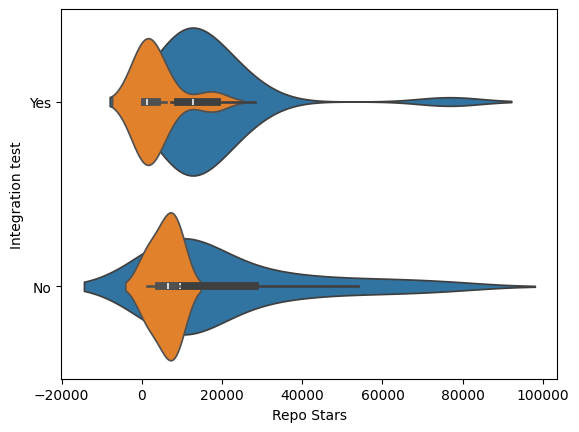

In [54]:
ax = sns.violinplot(data=df, x="Repo Stars", y="Integration test")
ax = sns.violinplot(data=df_MLprod, x="Stars", y="Integration test")

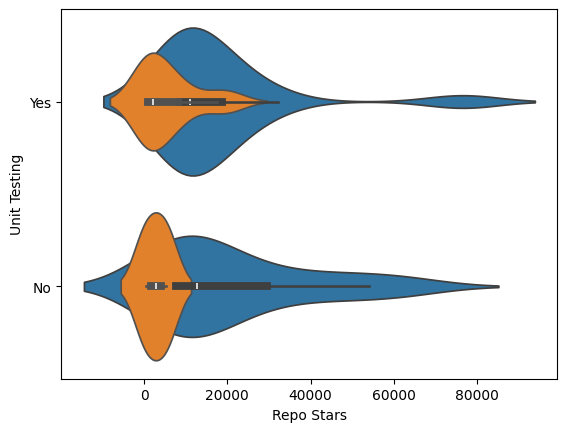

In [55]:
ax = sns.violinplot(data=df, x="Repo Stars", y="Unit Testing")
ax = sns.violinplot(data=df_MLprod, x="Stars", y="Unit Testing")